# Sentiment Analysis of Restaurant Reviews using Random Forest and Naive bayes

In [4]:
#Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [5]:
#reading the dataset
data = pd.read_csv("Restaurant_Reviews.tsv", delimiter='\t', quoting=3)
#prints the first five rows of the dataset
data.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [ ]:
# Shape and column names of dataset

print("Shape of dataset : ", data.shape)
print("Column headings : ", data.columns)

Shape of dataset :  (1000, 2)
Column headings :  Index(['Review', 'Liked'], dtype='object')


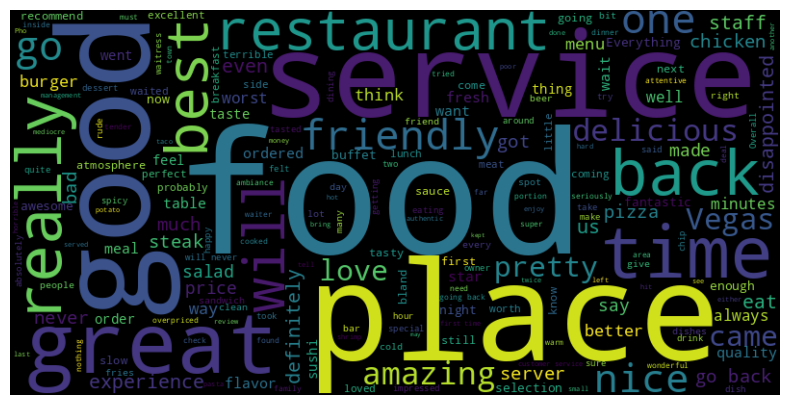

In [ ]:
# Combine all text data into a single string
text = " ".join(data['Review'])
# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(text)
# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


## Data Preprocessing

In [ ]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
# PorterStemmer ->reduces words to their root or base form
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
no_of_rows = data.shape[0]
stop_words = set(stopwords.words('english'))
corpus = []
for i in range(no_of_rows):
    review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=data['Review'][i])
    review = review.lower()
    review_words = review.split()
    review_words = [word for word in review_words if not word in stop_words]
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review_words]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
corpus

['wow love place',
 'crust good',
 'tasti textur nasti',
 'stop late may bank holiday rick steve recommend love',
 'select menu great price',
 'get angri want damn pho',
 'honeslti tast fresh',
 'potato like rubber could tell made ahead time kept warmer',
 'fri great',
 'great touch',
 'servic prompt',
 'would go back',
 'cashier care ever say still end wayyy overpr',
 'tri cape cod ravoli chicken cranberri mmmm',
 'disgust pretti sure human hair',
 'shock sign indic cash',
 'highli recommend',
 'waitress littl slow servic',
 'place worth time let alon vega',
 'like',
 'burritto blah',
 'food amaz',
 'servic also cute',
 'could care less interior beauti',
 'perform',
 'right red velvet cake ohhh stuff good',
 'never brought salad ask',
 'hole wall great mexican street taco friendli staff',
 'took hour get food tabl restaur food luke warm sever run around like total overwhelm',
 'worst salmon sashimi',
 'also combo like burger fri beer decent deal',
 'like final blow',
 'found place acc

In [ ]:
#CountVectorizer is used to convert a collection of text documents into a matrix of token counts.
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = data.iloc[:, 1].values

## Split data train & test data set


In [ ]:
#the data splitting is performed with a ratio of 80:20, where 80% of the data is used for training, and 20% of the data is used for testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 1500), (200, 1500), (800,), (200,))

## Model Training

In [ ]:
# Multinomial Naive Bayes classifier - is often used for text classification tasks.
from sklearn.naive_bayes import MultinomialNB

classifier = MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB()

In [ ]:
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1])

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

score_1 = accuracy_score(y_test, y_pred)
score_2 = precision_score(y_test, y_pred)
score_3 = recall_score(y_test, y_pred)

print("-----------Scores-----------")
print("Accuracy score is: {}%".format(round(score_1*100, 2)))
print("Precision score is: {}%".format(round(score_2*100, 2)))
print("Recall score is: {}%".format(round(score_3*100, 2)))

-----------Scores-----------
Accuracy score is: 76.5%
Precision score is: 76.42%
Recall score is: 78.64%


In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[72, 25],
       [22, 81]])

Text(95.72222222222221, 0.5, 'Actual values')

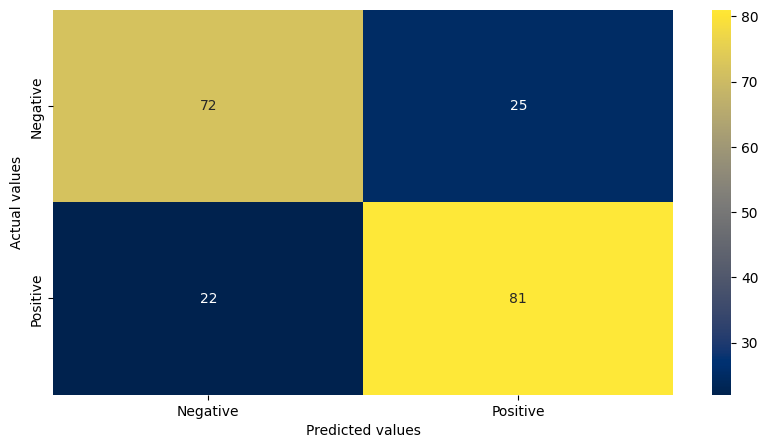

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.figure(figsize = (10, 5))
sns.heatmap(cm, annot=True, cmap='cividis', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted values')
plt.ylabel('Actual values')

In [ ]:
best_accuracy = 0.0
alpha_val = 0.0
for i in np.arange(0.1, 1.1, 0.1):
    temp_classifier = MultinomialNB(alpha=i)
    temp_classifier.fit(X_train, y_train)
    temp_y_pred = temp_classifier.predict(X_test)
    score = accuracy_score(y_test, temp_y_pred)
    print("Accuracy score for alpha = ", i, " is : ", round(score*100, 2))
    if score>best_accuracy:
        best_accuracy = score
        alpha_val = i
print()
print("Best accuracy is: ", round(best_accuracy*100, 2), " with aplha value: ", alpha_val)

Accuracy score for alpha =  0.1  is :  78.0
Accuracy score for alpha =  0.2  is :  78.5
Accuracy score for alpha =  0.30000000000000004  is :  78.0
Accuracy score for alpha =  0.4  is :  78.0
Accuracy score for alpha =  0.5  is :  77.5
Accuracy score for alpha =  0.6  is :  77.5
Accuracy score for alpha =  0.7000000000000001  is :  77.5
Accuracy score for alpha =  0.8  is :  77.0
Accuracy score for alpha =  0.9  is :  76.5
Accuracy score for alpha =  1.0  is :  76.5

Best accuracy is:  78.5  with aplha value:  0.2


In [ ]:
classifier = MultinomialNB(alpha=0.2)
classifier.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

## Predictions

In [ ]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]', repl=' ', string=sample_review)
    sample_review = sample_review.lower()
    sample_review = sample_review.split()
    sample_review_words = [word for word in sample_review if not word in stop_words]
    ps = PorterStemmer()
    final = [ps.stem(word) for word in sample_review_words]
    final = ' '.join(final)

    temp = cv.transform([final]).toarray()
    return classifier.predict(temp)

In [ ]:
sample_review = 'The food is really bad.'
if predict_sentiment(sample_review):
    print("This is POSITIVE review")
else:
    print("This is NEGATIVE review")

This is NEGATIVE review


In [ ]:
sample_review = 'The food was really bad and the service was very slow.'
if predict_sentiment(sample_review):
    print("This is POSITIVE review")
else:
    print("This is NEGATIVE review")

This is NEGATIVE review


In [ ]:
sample_review = 'The food was absloutely wonderful, from preparation to presentation, very plasing.'
if predict_sentiment(sample_review):
    print("This is POSITIVE review")
else:
    print("This is NEGATIVE review")

This is POSITIVE review


# Using Random Forest Model (71.5% accuracy)

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['Review'], data['Liked'], test_size=0.2, random_state=42)

# Vectorize the text data using CountVectorizer
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Create a Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier on the training data
rf_classifier.fit(X_train_vec, y_train)

# Predict sentiment labels on the test data
y_pred = rf_classifier.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Test accuracy: {accuracy:.4f}')

# Display a classification report for more detailed metrics
print(classification_report(y_test, y_pred))


Test accuracy: 0.7150
              precision    recall  f1-score   support

           0       0.66      0.83      0.74        96
           1       0.80      0.61      0.69       104

    accuracy                           0.71       200
   macro avg       0.73      0.72      0.71       200
weighted avg       0.73      0.71      0.71       200

